In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Air quality in Frankfurt has been monitored between the 31/12/2018 and the 20/02/2020. Some observations in relation to time, weather, air pollution (PM 2.5) values collected from some sense-boxes installed in 14 locations scattered in Frankfurt, Germany.

An Air quality dataset has been made available in publicly. The dataset has the following data:

temperatures

pressure

humidity

wind speed

peak or no peak: 0: 'Peak', 1: 'No_Peak'

time of day : 0: 'Evening_Hours', 1: 'Night_Hours', 2: 'Morning_Hours', 3: 'Afternoon_Hours'

day : 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'

week day : 0: 'Workday', 1: 'Weekend'

weather : 0: 'Clouds', 1: 'Mist', 2: 'Fog', 3: 'Rain', 4: 'Drizzle', 5: 'Drizzle + Rain', 6: 'Clear', 7: 'Snow', 8: 'Snow + Mist', 9: 'Drizzle + Snow + Mist', 10: 'Drizzle + Rain + Mist', 11: 'Drizzle + Mist', 12: 'Rain + Snow', 13: 'Rain + Mist', 14: 'Mist + Fog', 15: 'Thunderstorm + Rain', 16: 'Squall', 17: 'Haze', 18: 'Thunderstorm', 19: 'Thunderstorm + Squall', 20: 'Rain + Fog', 21: 'Snow + Mist + Fog', 22: 'Snow + Fog'}

lattitude

longitude

pm 2.5 level: see explanation below

A PM 2.5 level obtained following the range of values

Between [0 and 10] - lowest risks to increase pulmonary disease - PM 2.5 Level 1

Between ]10 and 15], PM 2.5 level = 2

Between ]15 and 25], PM 2.5 level = 3

Between ]25 and 35], PM 2.5 level = 4

PM 2.5 > 35, PM 2.5 level = 5 - long term mortality risks

In [2]:
#Load dataset into pandas dataframe
df = pd.read_csv("./Air Quality Benchmark dataset.csv")
#Print first 10 rows of the dataset.
df.head(10)

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,label
0,2018-12-31 18:30:12,iGude,18.20,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,normal
1,2018-12-31 18:32:41,iGude,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,normal
2,2018-12-31 18:35:11,iGude,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,normal
3,2018-12-31 18:37:41,iGude,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,normal
4,2018-12-31 18:40:11,iGude,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,normal
5,2018-12-31 18:42:40,iGude,27.60,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,normal
6,2018-12-31 18:45:09,iGude,27.87,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,normal
7,2018-12-31 18:47:39,iGude,20.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,normal
8,2018-12-31 18:50:08,iGude,24.35,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,normal
9,2018-12-31 18:52:37,iGude,21.42,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,normal


In [3]:
#print number of rows and columns in that dataset
df.shape

(1230693, 13)

This dataset contain 1230693 rows and 13 columns.

In [4]:
#Print name of the all columns. 
df.columns

Index(['Time_stamp', 'boxName', 'PM 2.5', 'temp', 'pressure', 'humidity',
       'wind_speed', 'Time of Day', 'Peak/NoPeak', 'Day', 'Week Day',
       'Weather', 'label'],
      dtype='object')

In [5]:
#Print more information about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230693 entries, 0 to 1230692
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Time_stamp   1230693 non-null  object 
 1   boxName      1230693 non-null  object 
 2   PM 2.5       1230693 non-null  float64
 3   temp         1230693 non-null  float64
 4   pressure     1230693 non-null  int64  
 5   humidity     1230693 non-null  int64  
 6   wind_speed   1230693 non-null  float64
 7   Time of Day  1230693 non-null  object 
 8   Peak/NoPeak  1230693 non-null  object 
 9   Day          1230693 non-null  object 
 10  Week Day     1230693 non-null  object 
 11  Weather      1230693 non-null  object 
 12  label        1230693 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 122.1+ MB


In [6]:
#Check duplicate values in that dataset.
df.duplicated().sum()

0

This dataset doesn't contain duplicate values.

In [7]:
#Check null values in each column.
df.isnull().sum()

Time_stamp     0
boxName        0
PM 2.5         0
temp           0
pressure       0
humidity       0
wind_speed     0
Time of Day    0
Peak/NoPeak    0
Day            0
Week Day       0
Weather        0
label          0
dtype: int64

This dataset doesn't contain null values.

In [8]:
#Get description about dataset.
df.describe()

,PM 2.5,temp,pressure,humidity,wind_speed
count,1.230693e+06,1.230693e+06,1.230693e+06,1.230693e+06,1.230693e+06
mean,8.343975e+00,9.813300e+00,1.015272e+03,7.533406e+01,3.781297e+00
std,1.244952e+01,7.726966e+00,1.068135e+01,1.876159e+01,2.313942e+00
min,0.000000e+00,-8.910000e+00,9.760000e+02,1.400000e+01,3.100000e-01
25%,2.470000e+00,4.140000e+00,1.009000e+03,6.500000e+01,2.100000e+00
50%,5.000000e+00,8.200000e+00,1.015000e+03,8.000000e+01,3.600000e+00
75%,1.090000e+01,1.469000e+01,1.022000e+03,9.200000e+01,5.100000e+00
max,9.999000e+02,3.928000e+01,1.046000e+03,1.000000e+02,1.750000e+01


## Categorical features representing using bargraph.

Time_stamp

boxName

Time of Day  

Peak/NoPeak  

Day

Week Day

Weather

Weather Description

label      

In [9]:
print(df['Time_stamp'].value_counts())

2020-01-10 13:56:06    6
2020-02-22 04:40:12    5
2019-12-23 14:12:54    4
2019-12-22 05:33:50    4
2019-12-21 02:27:01    4
                      ..
2019-01-12 16:42:41    1
2019-01-12 16:45:11    1
2019-01-12 16:47:40    1
2019-01-12 16:52:37    1
2020-02-28 18:29:47    1
Name: Time_stamp, Length: 1188195, dtype: int64


In [10]:
#drop the Time_stamp column.
df.drop(columns = 'Time_stamp', axis = 1, inplace = True)

Frankfurt_Riederwald        236062
Rothschildallee             231376
Bernem                      162173
nordsand                    153296
FeinstaubFFM                150225
MousonSense                  97472
Ginnheim_Dust_Light_Temp     55480
s4                           44324
ioki                         35798
Luftdaten.info [6703181]     30120
FFM_Westend_Sued             17732
iGude                        10951
Alt Bornheim Feinstaub        5295
Medienzentrum Frankfurt        389
Name: boxName, dtype: int64


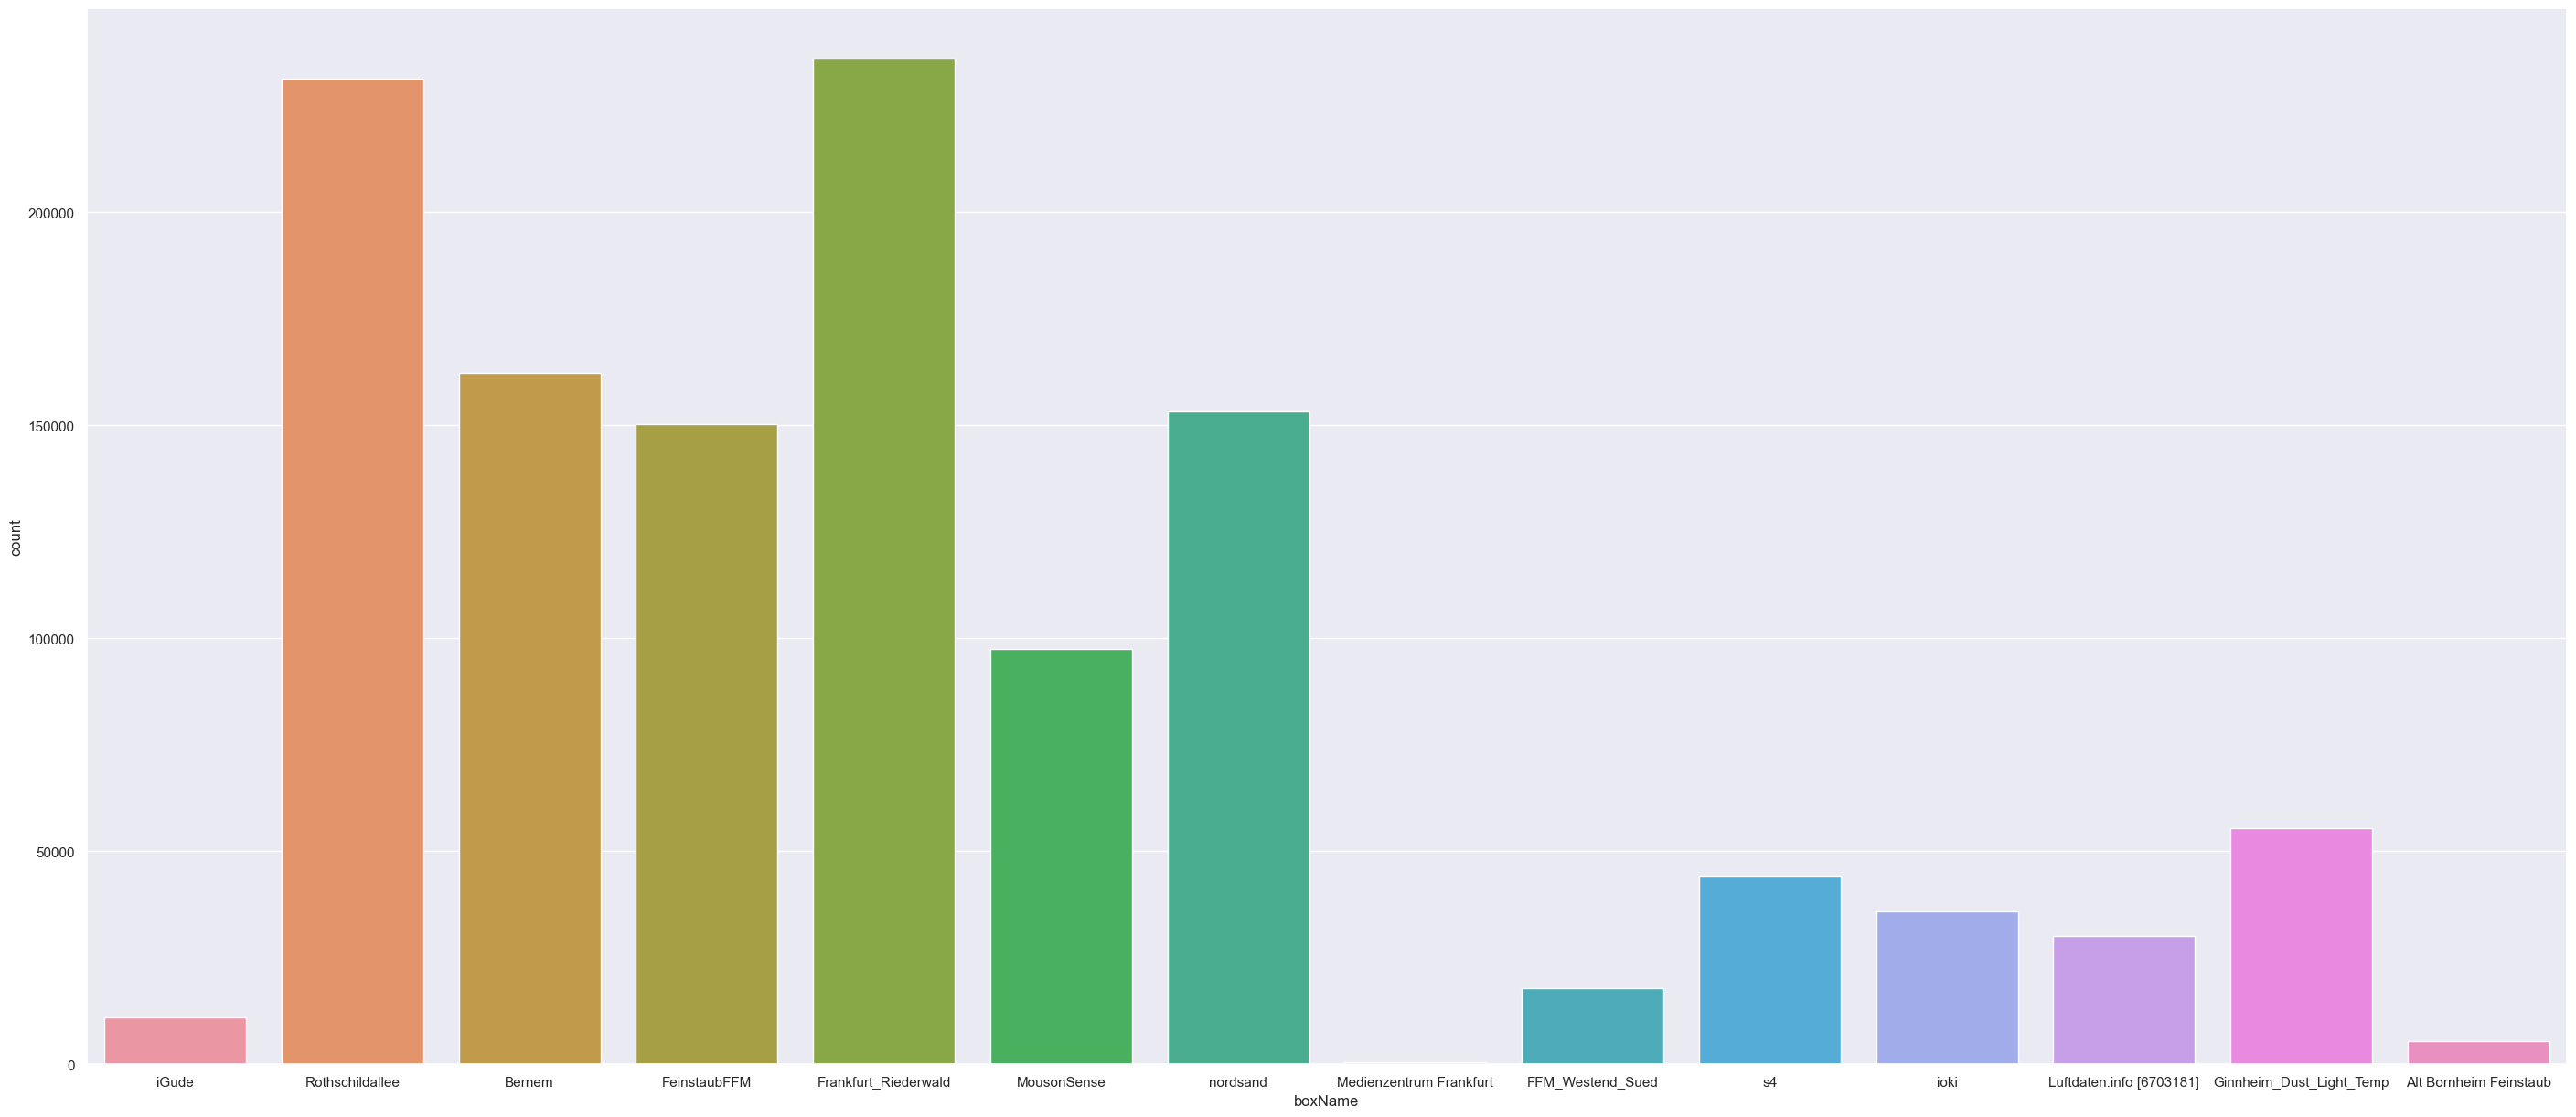

In [11]:
print(df['boxName'].value_counts())

sns.set()
plt.figure(figsize = (35, 15))
sns.countplot(x = 'boxName', data = df)
plt.show()

In [12]:
#Drop boxName column
df.drop(columns = 'boxName', axis = 1, inplace = True)

Night_Hours        463061
Morning_Hours      307199
Afternoon_Hours    255181
Evening_Hours      205252
Name: Time of Day, dtype: int64


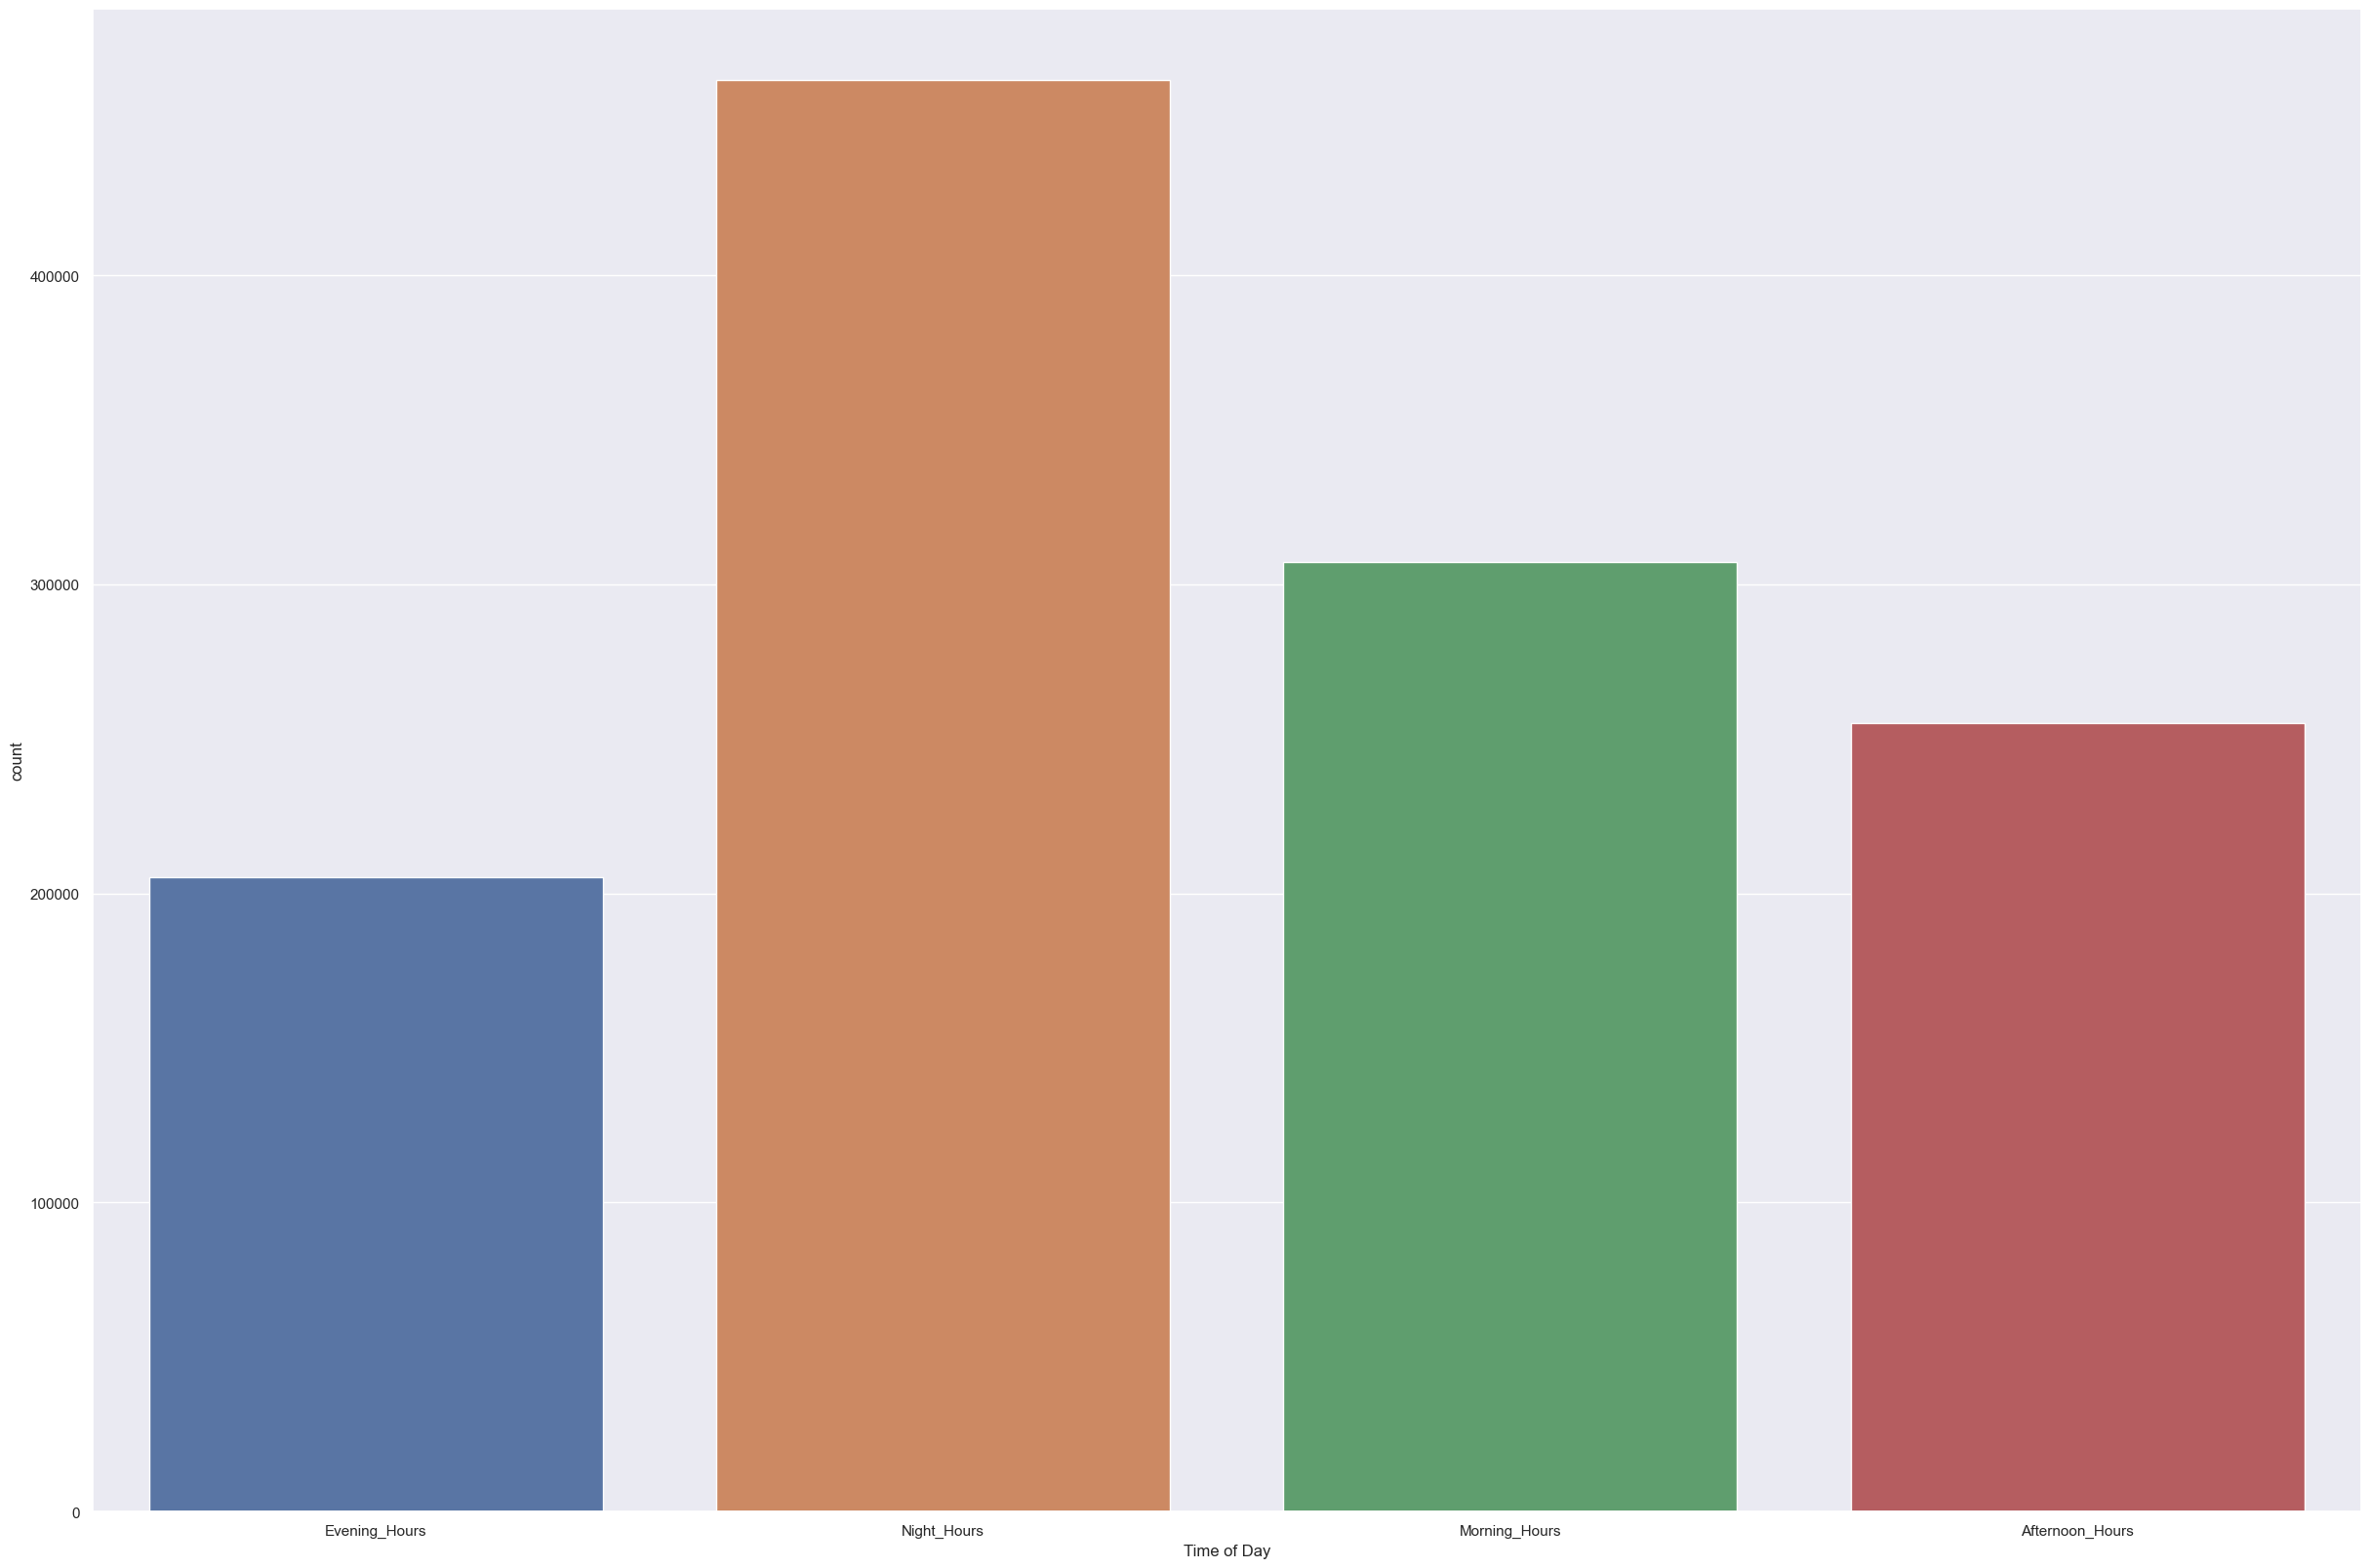

In [13]:
print(df['Time of Day'].value_counts())

sns.set()
plt.figure(figsize = (30, 20))
sns.countplot(x = 'Time of Day', data =df)
plt.show()

No_Peak    768785
Peak       461908
Name: Peak/NoPeak, dtype: int64


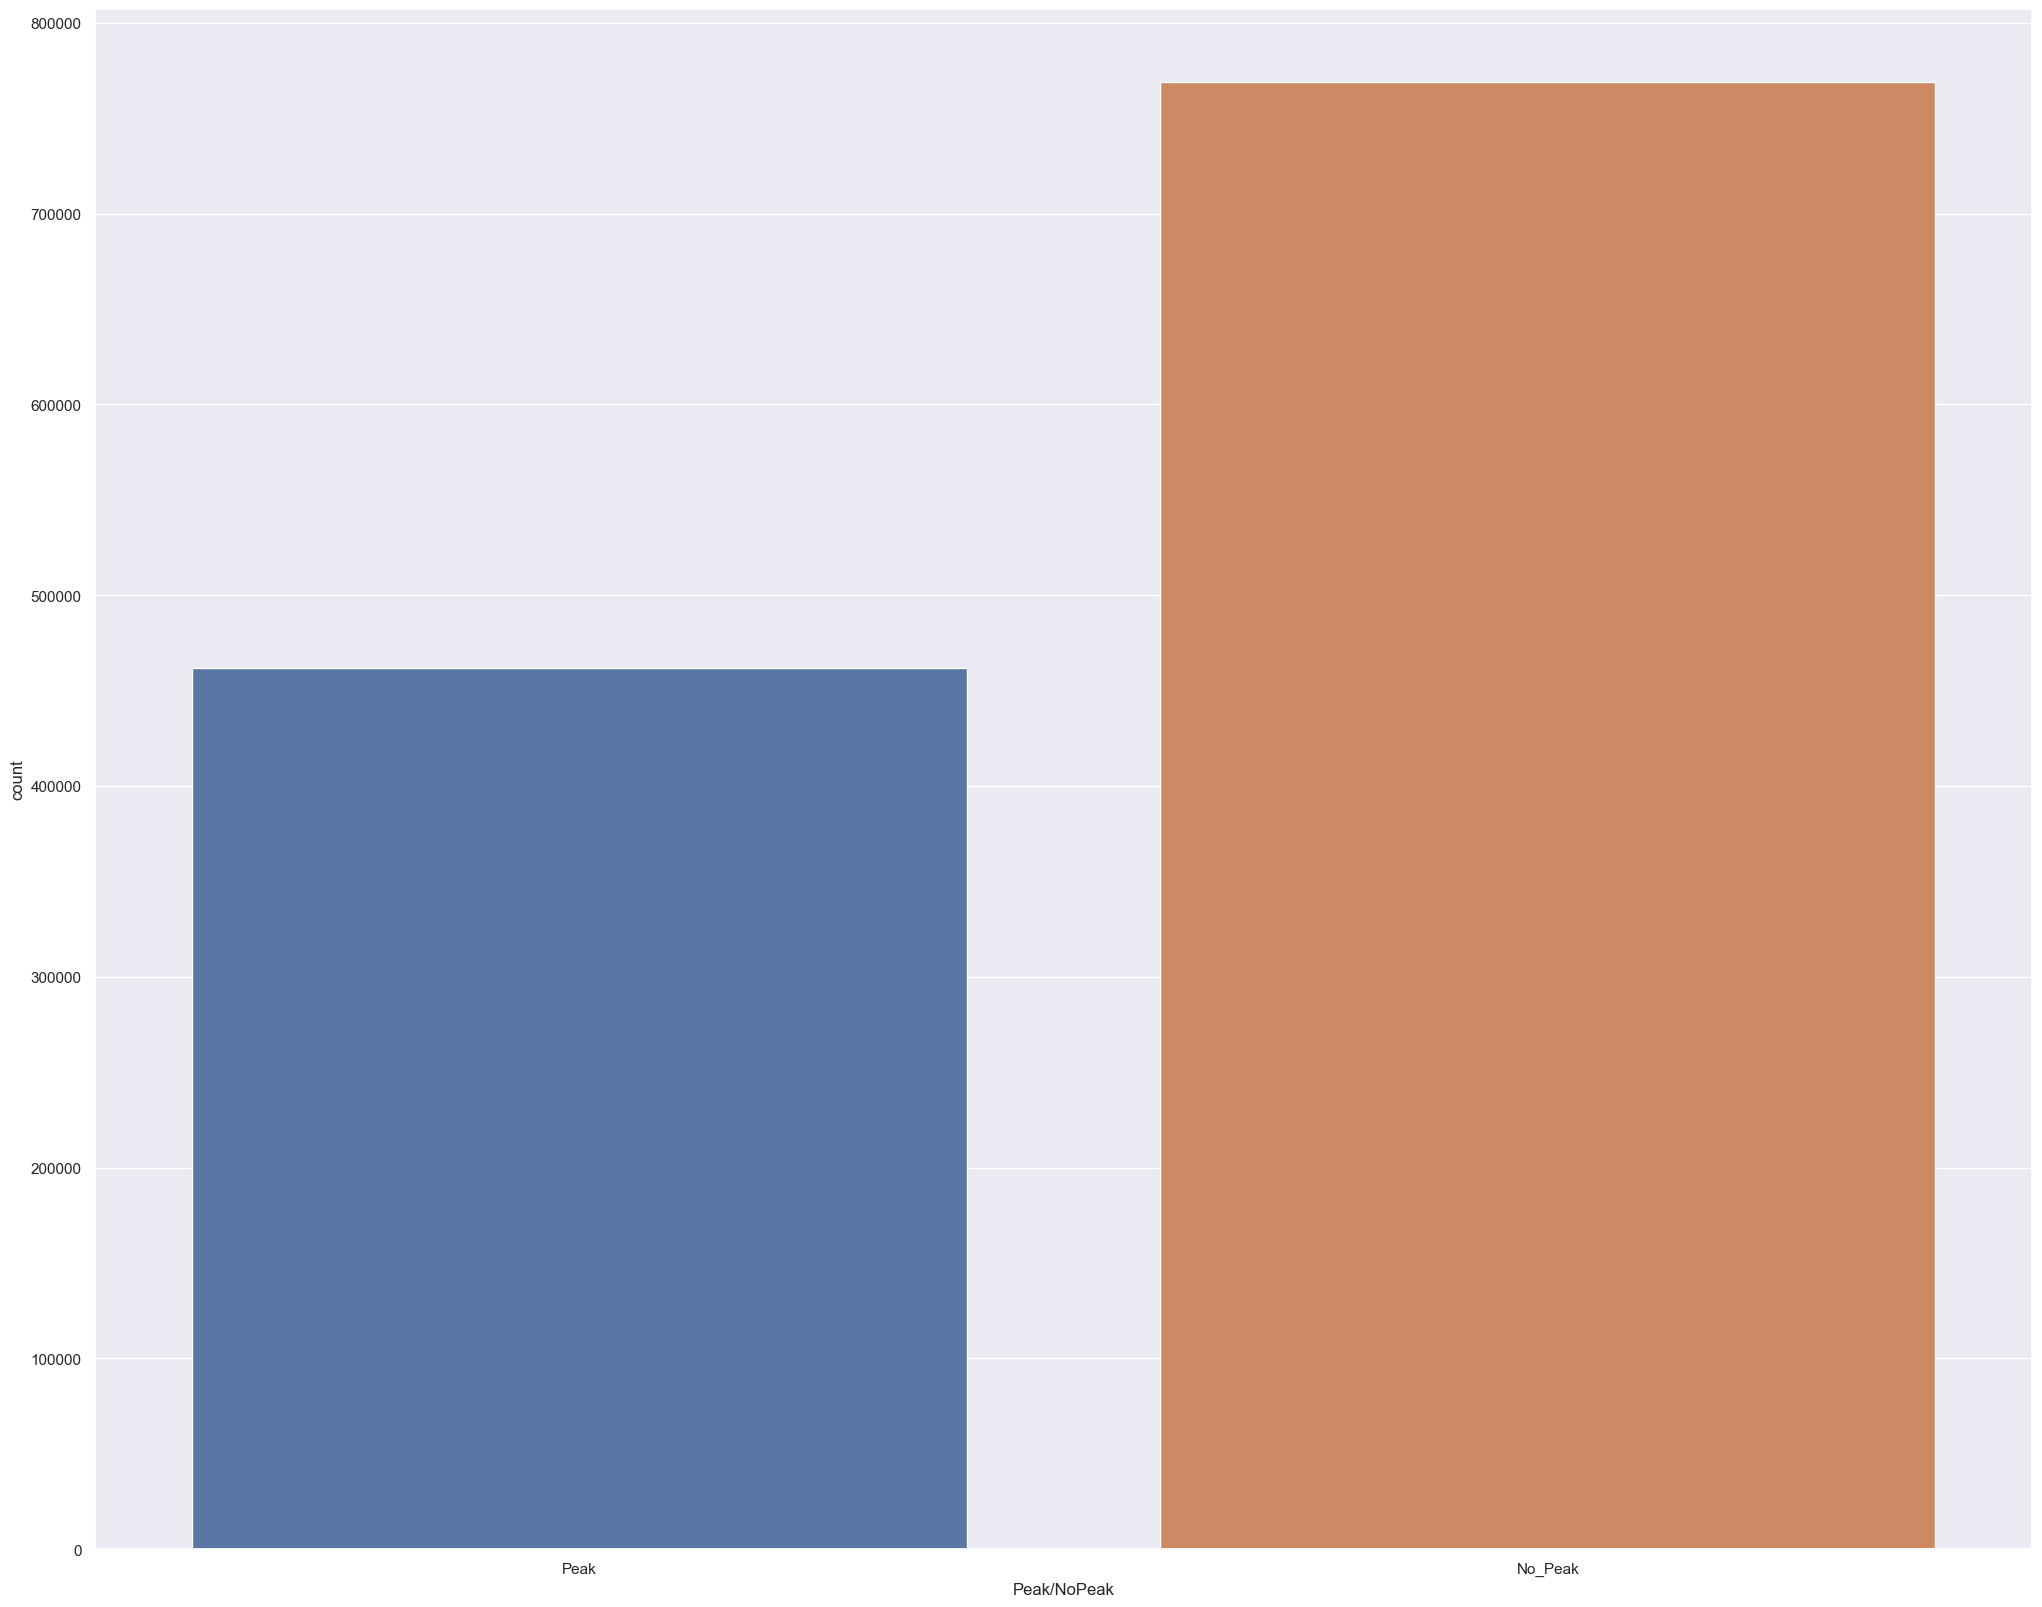

In [14]:
print(df['Peak/NoPeak'].value_counts())

sns.set()
plt.figure(figsize = (25, 20))
sns.countplot(x = 'Peak/NoPeak', data =df)
plt.show()

Thursday     177198
Friday       176575
Tuesday      176500
Monday       175581
Wednesday    175507
Sunday       175495
Saturday     173837
Name: Day, dtype: int64


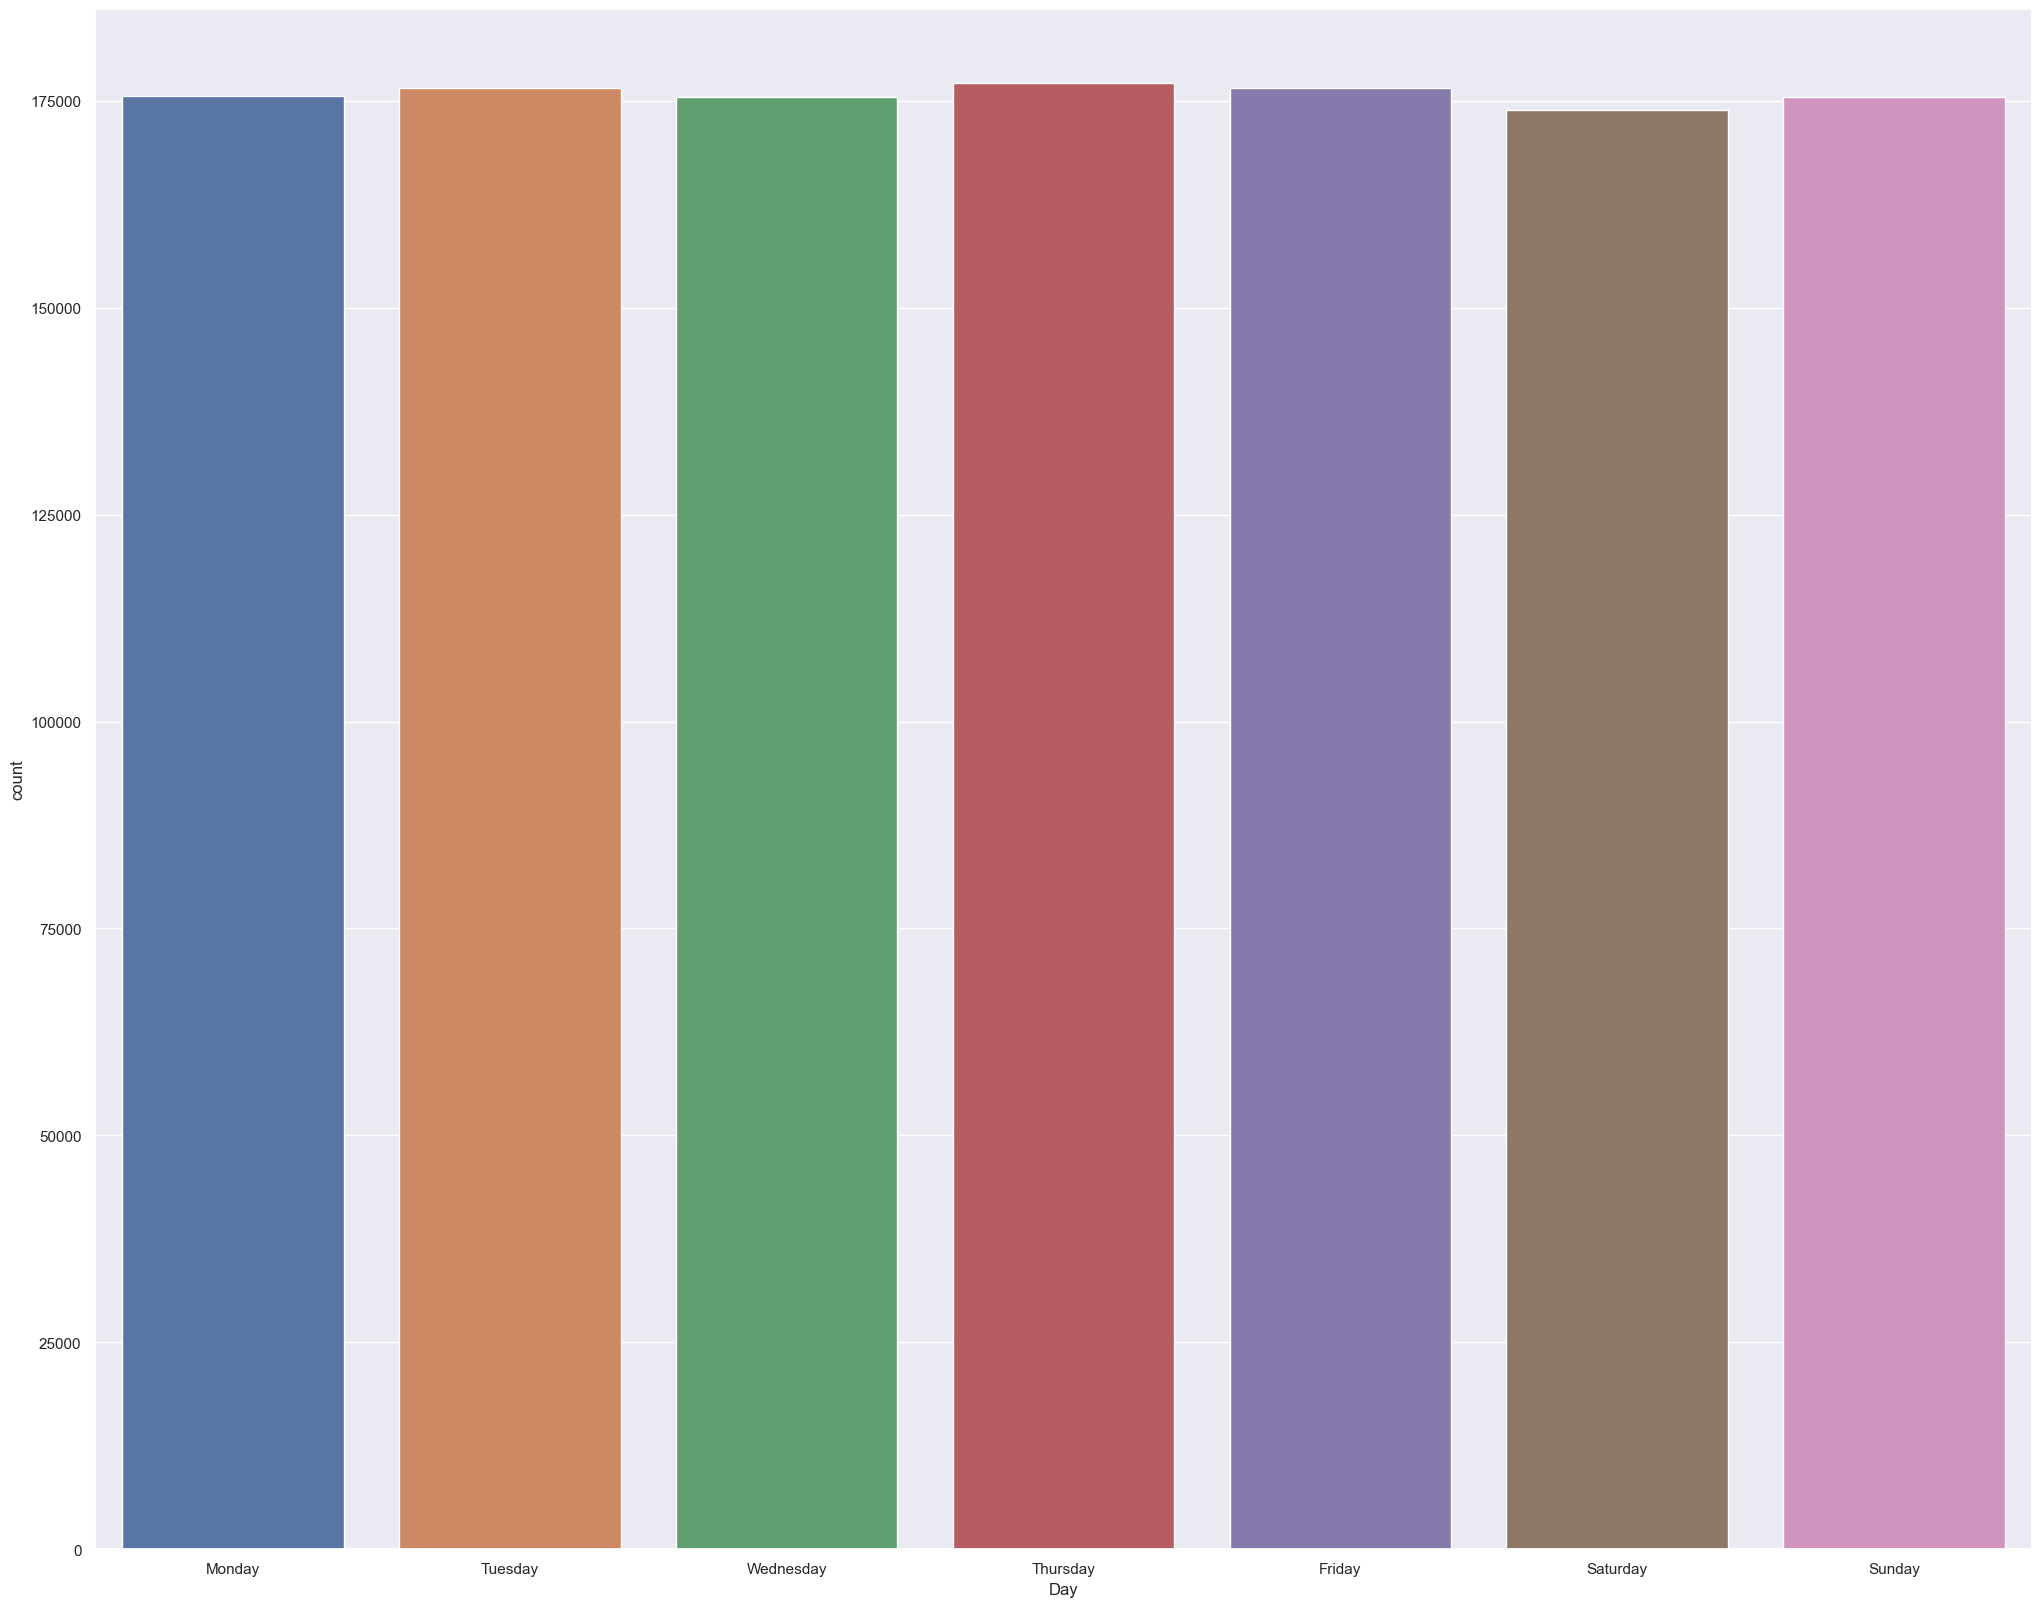

In [15]:
print(df['Day'].value_counts())

sns.set()
plt.figure(figsize = (25, 20))
sns.countplot(x = 'Day', data =df)
plt.show()

Workday    881361
Weekend    349332
Name: Week Day, dtype: int64


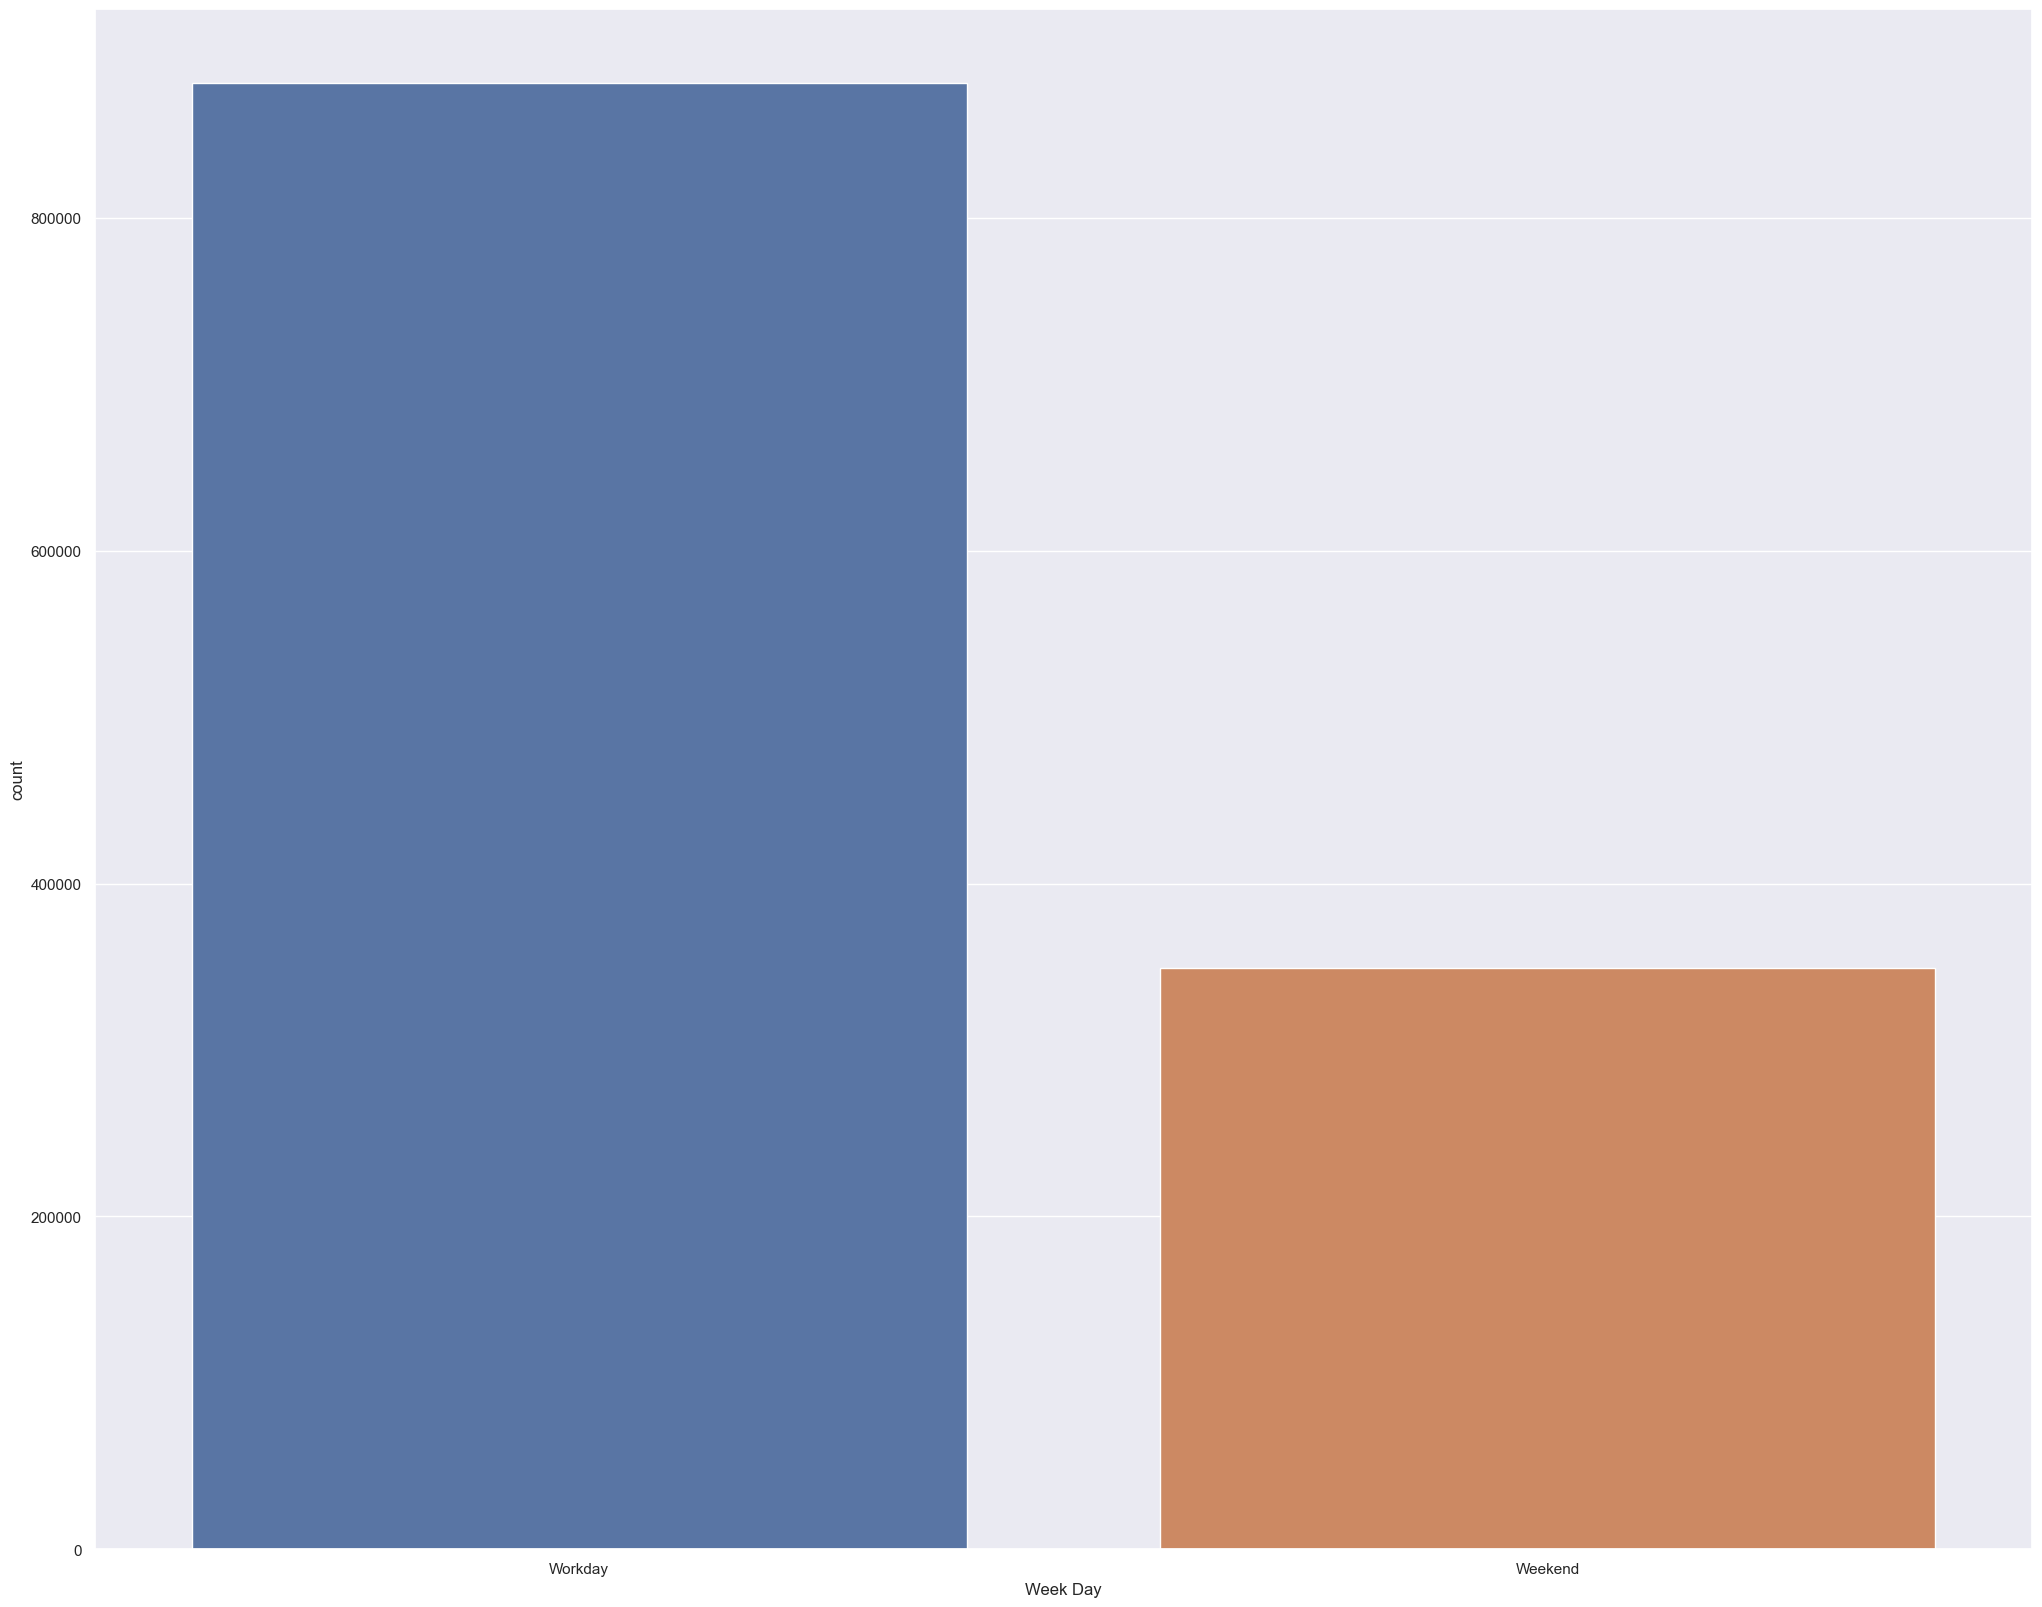

In [16]:
print(df['Week Day'].value_counts())

sns.set()
plt.figure(figsize = (25, 20))
sns.countplot(x = 'Week Day', data =df)
plt.show()

Clouds                   768457
Rain                     216629
Clear                    149080
Fog                       27067
Mist                      22278
Drizzle                    8347
Snow                       8174
Drizzle + Mist             7818
Drizzle + Rain             5374
Mist + Fog                 4364
Drizzle + Rain + Mist      2439
Snow + Mist                2329
Rain + Mist                2151
Rain + Snow                2146
Thunderstorm + Rain        1744
Thunderstorm                998
Rain + Fog                  352
Haze                        317
Snow + Mist + Fog           208
Snow + Fog                  138
Drizzle + Snow + Mist       120
Thunderstorm + Squall       103
Squall                       60
Name: Weather, dtype: int64


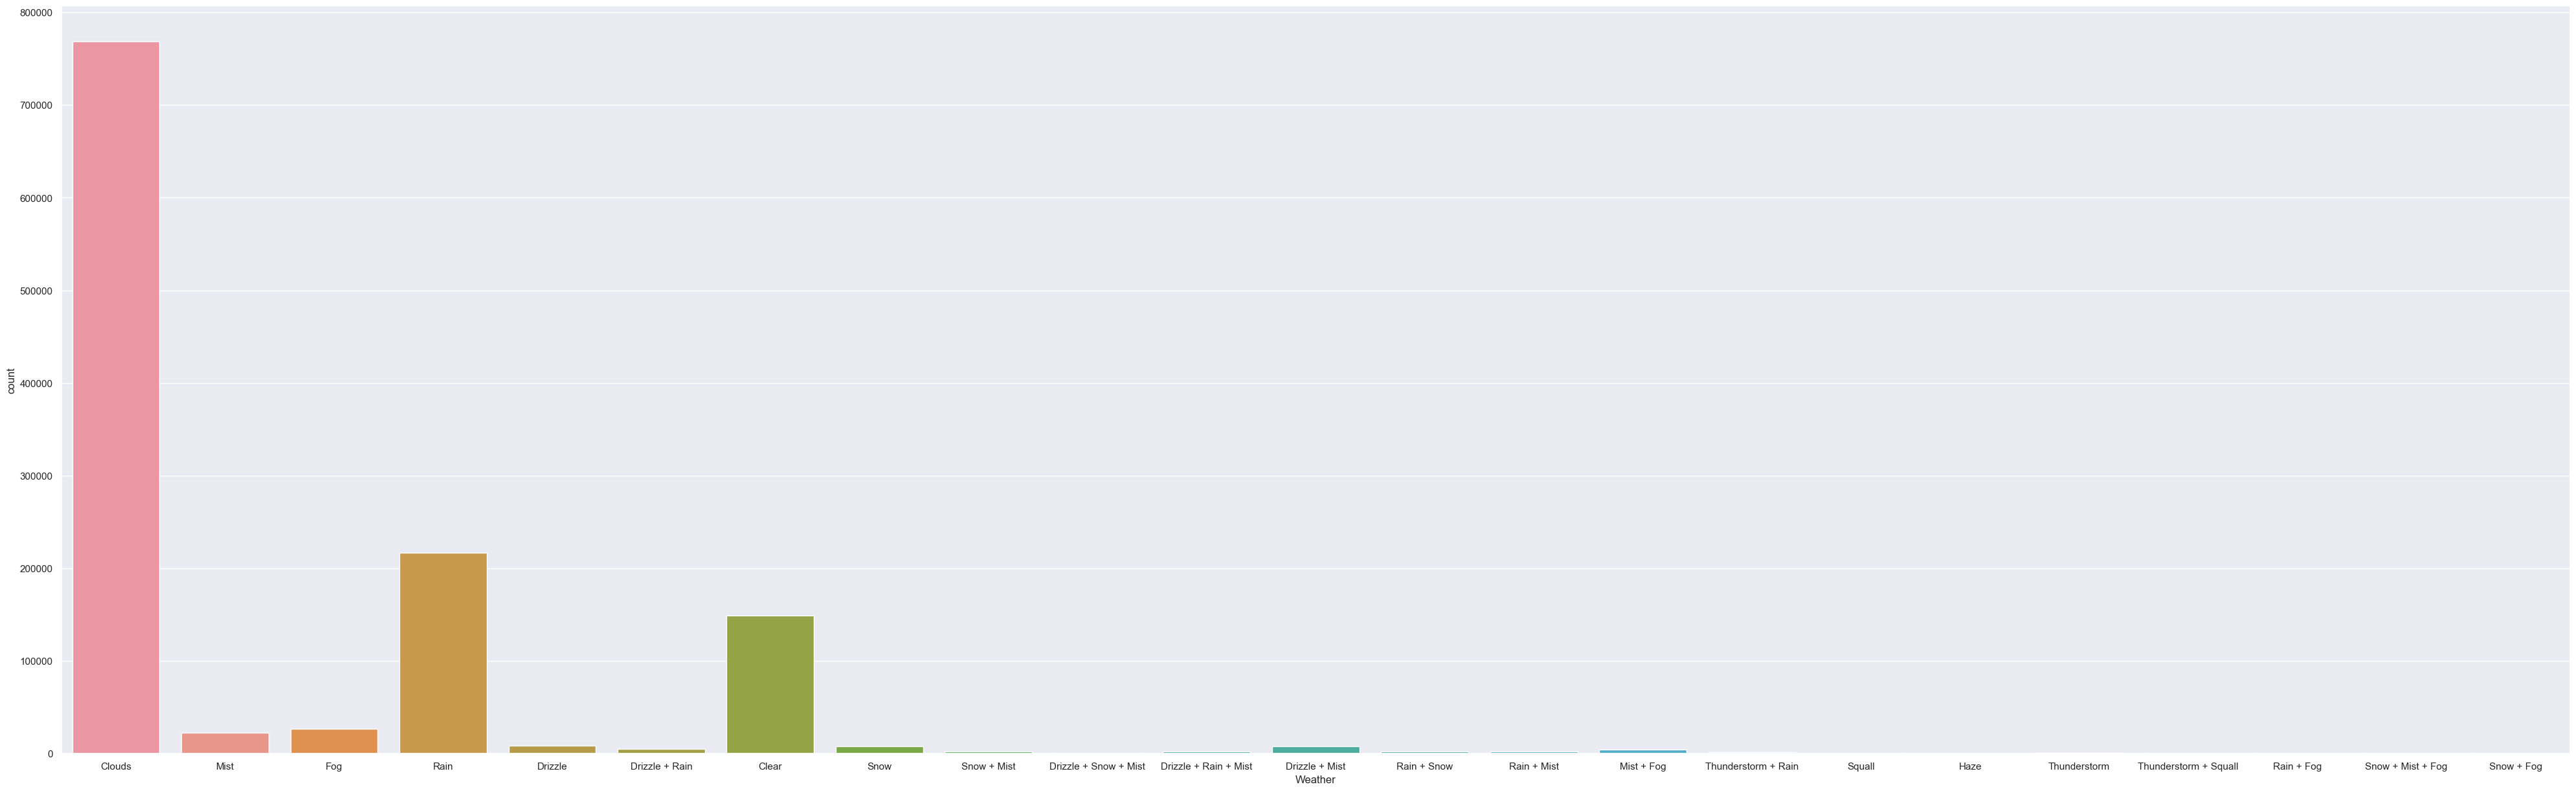

In [17]:
print(df['Weather'].value_counts())

sns.set()
plt.figure(figsize = (50, 15))
sns.countplot(x = 'Weather', data =df)
plt.show()

normal      1169326
abnormal      61367
Name: label, dtype: int64


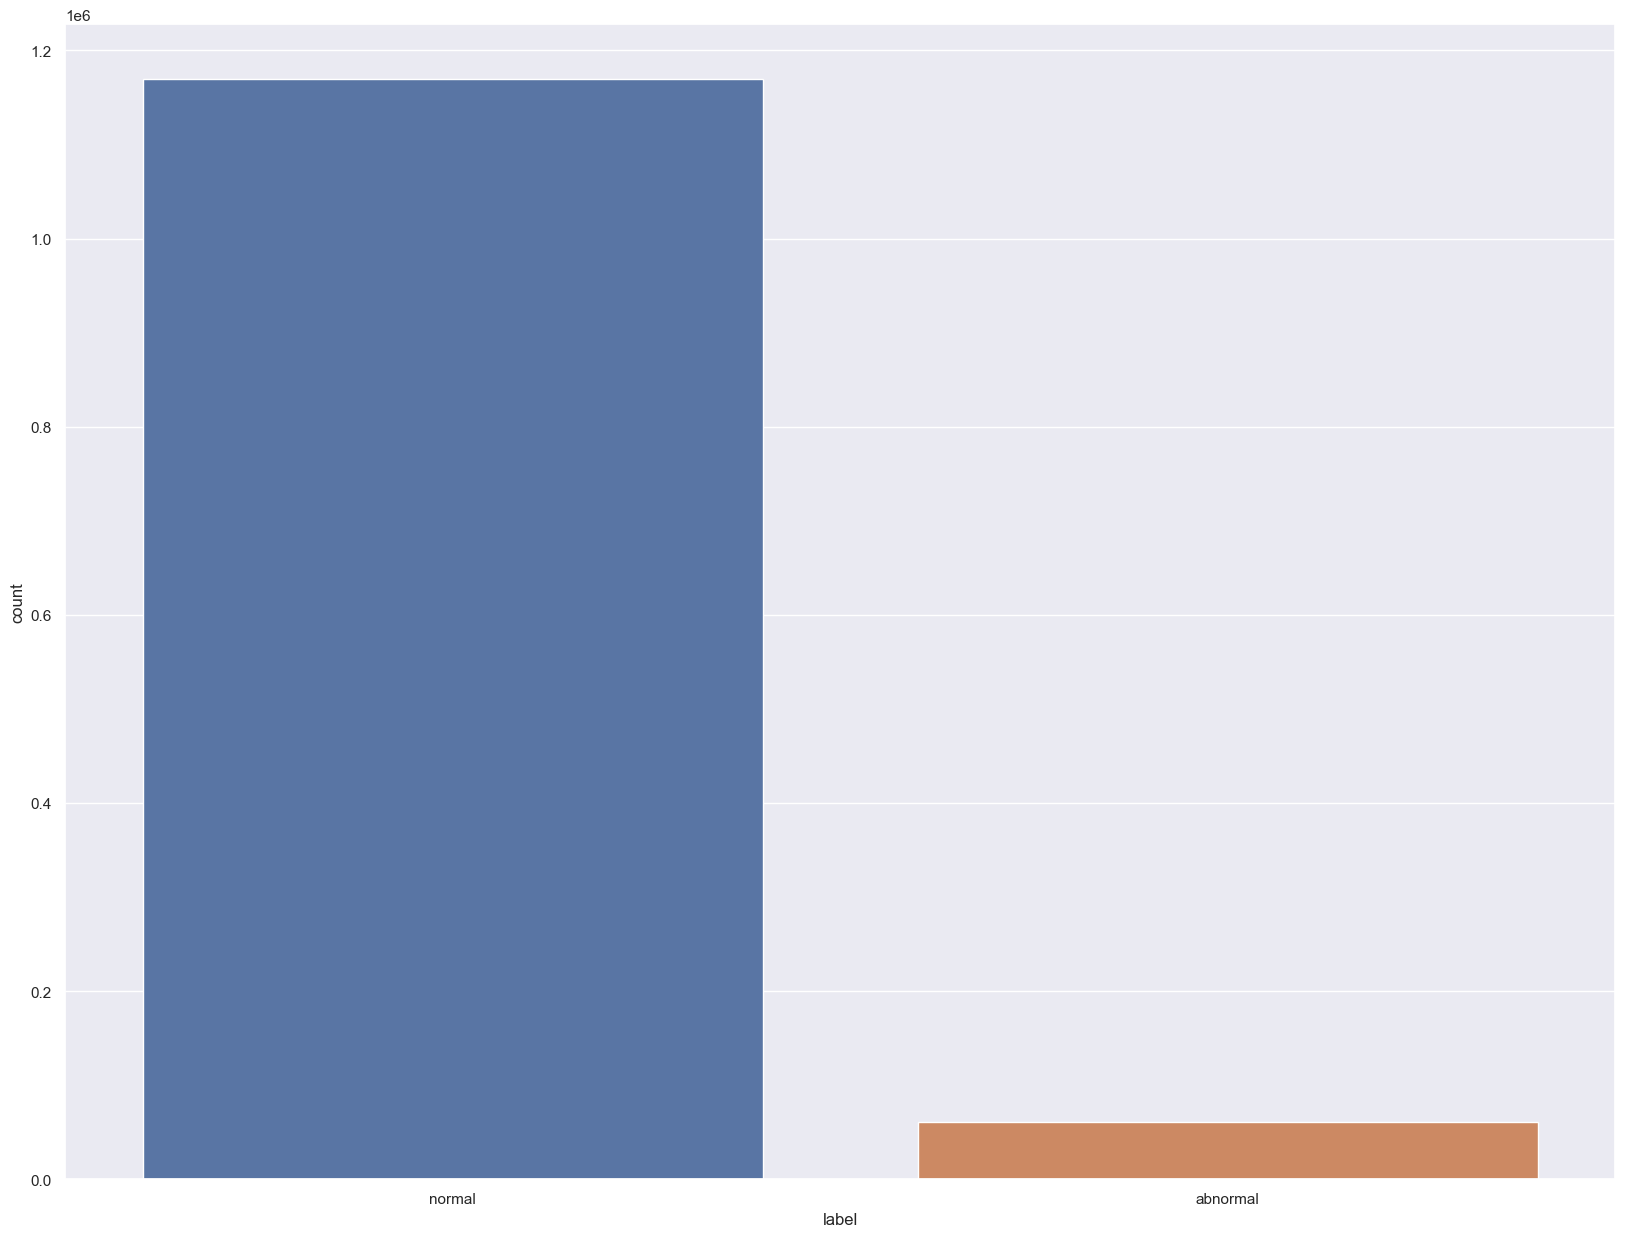

In [18]:
print(df['label'].value_counts())

sns.set()
plt.figure(figsize = (20, 15))
sns.countplot(x = 'label', data =df)
plt.show()

## Numerical features representing 

PM 2.5 column


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


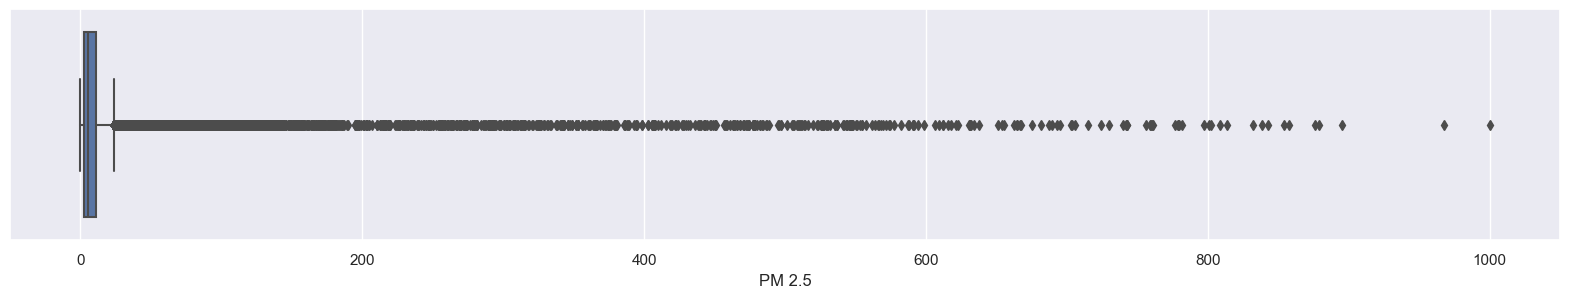

--------------------------------------------------------------------------------------------------------------
temp column


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


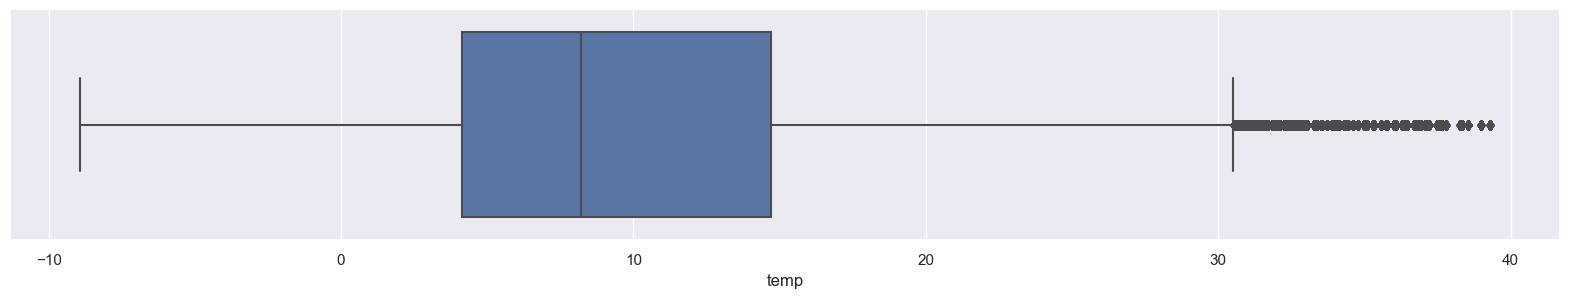

--------------------------------------------------------------------------------------------------------------
pressure column


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


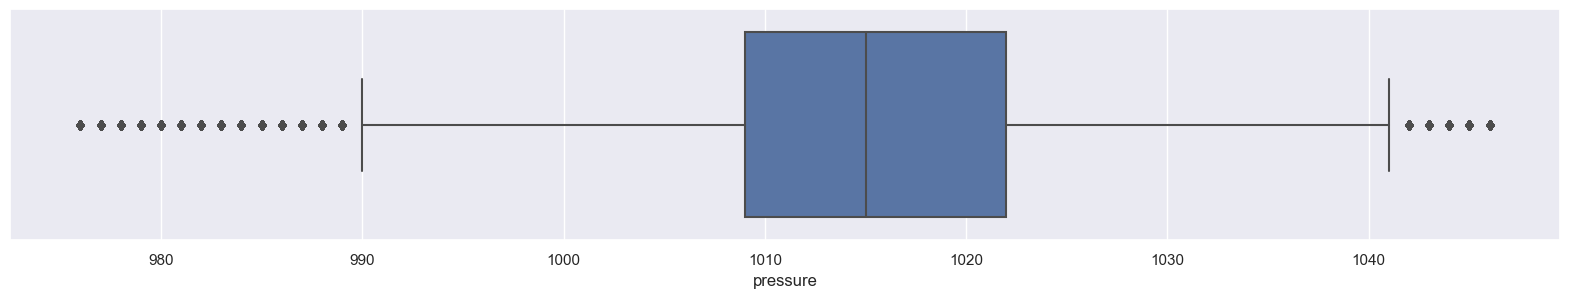

--------------------------------------------------------------------------------------------------------------
humidity column


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


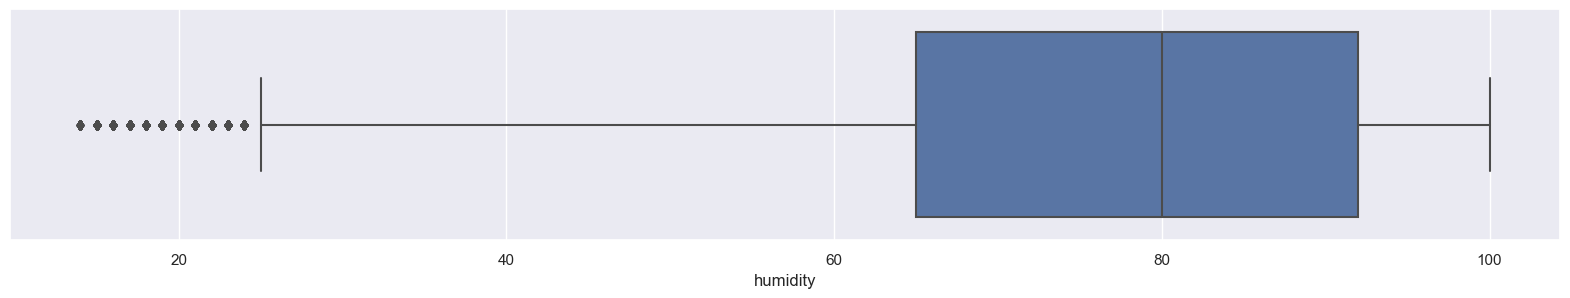

--------------------------------------------------------------------------------------------------------------


In [19]:
k = ('PM 2.5', 'temp', 'pressure', 'humidity')

for i in k:
    print(i, "column")
    sns.set()
    plt.figure(figsize = (20, 3))
    sns.boxplot(df[i])
    plt.show()
    print("--------------------------------------------------------------------------------------------------------------")

In [20]:
#print first 5 rows of dataset
df.head()

,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,label
0,18.20,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,normal
1,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,normal
2,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,normal
3,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,normal
4,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,normal


In [21]:
#Print number of rows and columns of dataset.
df.shape

(1230693, 11)

Now dataset contain 1230693 rows and 11 columns

In [22]:
#Encode cato
le = LabelEncoder()

In [23]:
df['Time of Day1'] = le.fit_transform(df[['Time of Day']])

k = np.sort(df['Time of Day'].unique())
print(k)

j = 0;

for i in k:
    print(i, "----->", j)
    j = j + 1

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Afternoon_Hours' 'Evening_Hours' 'Morning_Hours' 'Night_Hours']
Afternoon_Hours -----> 0
Evening_Hours -----> 1
Morning_Hours -----> 2
Night_Hours -----> 3


In [24]:
df['Peak/NoPeak1'] = le.fit_transform(df[['Peak/NoPeak']])

k = np.sort(df['Peak/NoPeak'].unique())
print(k)

j = 0;

for i in k:
    print(i, "----->", j)
    j = j + 1

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['No_Peak' 'Peak']
No_Peak -----> 0
Peak -----> 1


In [25]:
df['Day1'] = le.fit_transform(df[['Day']])

k = np.sort(df['Day'].unique())
print(k)

j = 0;

for i in k:
    print(i, "----->", j)
    j = j + 1

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
Friday -----> 0
Monday -----> 1
Saturday -----> 2
Sunday -----> 3
Thursday -----> 4
Tuesday -----> 5
Wednesday -----> 6


In [26]:
df['Week Day1'] = le.fit_transform(df[['Week Day']])

k = np.sort(df['Week Day'].unique())
print(k)

j = 0;

for i in k:
    print(i, "----->", j)
    j = j + 1

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Weekend' 'Workday']
Weekend -----> 0
Workday -----> 1


In [27]:
df['label1'] = le.fit_transform(df[['label']])

k = np.sort(df['label'].unique())
print(k)

j = 0;

for i in k:
    print(i, "----->", j)
    j = j + 1

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['abnormal' 'normal']
abnormal -----> 0
normal -----> 1


In [28]:
df['Time of Day'] = df['Time of Day1']
df['Peak/NoPeak'] = df['Peak/NoPeak1'] 
df['Day'] = df['Day1']
df['Week Day'] = df['Week Day1']
df['label'] = df['label1']

df.drop(columns = ['Time of Day1', 'Peak/NoPeak1', 'Day1', 'Week Day1', 'label1'], axis = 1, inplace = True)

df.head(5)

,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,label
0,18.20,7.71,1032,100,3.09,1,1,1,1,Clouds,1
1,19.27,7.71,1032,100,3.09,1,1,1,1,Clouds,1
2,18.57,7.71,1032,100,3.09,1,1,1,1,Clouds,1
3,17.85,7.71,1032,100,3.09,1,1,1,1,Clouds,1
4,25.95,7.71,1032,100,3.09,1,1,1,1,Clouds,1


In [29]:
#split Weather column values
df['Weather'].str.split('+', expand = True)

,0,1,2
0,Clouds,None,None
1,Clouds,None,None
2,Clouds,None,None
3,Clouds,None,None
4,Clouds,None,None
...,...,...,...
1230688,Clear,None,None
1230689,Clear,None,None
1230690,Clear,None,None
1230691,Clear,None,None


In [30]:
df['Weather1'] = df['Weather'].str.split('+', expand = True)[0].str.strip()
df['Weather2'] = df['Weather'].str.split('+', expand = True)[1].str.strip()
df['Weather3'] = df['Weather'].str.split('+', expand = True)[2].str.strip()

print("------------------------------------------------------------------------------------------------------------------")
print("Weater1 column unique values :")
print(df['Weather1'].unique())
print("------------------------------------------------------------------------------------------------------------------")
print("Weater2 column unique values :")
print(df['Weather2'].unique())
print("------------------------------------------------------------------------------------------------------------------")
print("Weater3 column unique values :")
print(df['Weather3'].unique())
print("------------------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------------------
Weater1 column unique values :
['Clouds' 'Mist' 'Fog' 'Rain' 'Drizzle' 'Clear' 'Snow' 'Thunderstorm'
 'Squall' 'Haze']
------------------------------------------------------------------------------------------------------------------
Weater2 column unique values :
[None 'Rain' 'Mist' 'Snow' 'Fog' 'Squall']
------------------------------------------------------------------------------------------------------------------
Weater3 column unique values :
[None 'Mist' 'Fog']
------------------------------------------------------------------------------------------------------------------


In [31]:
df.head(3)

,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,label,Weather1,Weather2,Weather3
0,18.20,7.71,1032,100,3.09,1,1,1,1,Clouds,1,Clouds,None,None
1,19.27,7.71,1032,100,3.09,1,1,1,1,Clouds,1,Clouds,None,None
2,18.57,7.71,1032,100,3.09,1,1,1,1,Clouds,1,Clouds,None,None


In [32]:
#drop Weather column.
df.drop(columns = ['Weather'], axis = 1, inplace = True)

df.head(5)

,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,label,Weather1,Weather2,Weather3
0,18.20,7.71,1032,100,3.09,1,1,1,1,1,Clouds,None,None
1,19.27,7.71,1032,100,3.09,1,1,1,1,1,Clouds,None,None
2,18.57,7.71,1032,100,3.09,1,1,1,1,1,Clouds,None,None
3,17.85,7.71,1032,100,3.09,1,1,1,1,1,Clouds,None,None
4,25.95,7.71,1032,100,3.09,1,1,1,1,1,Clouds,None,None


In [33]:
le = LabelEncoder()

In [34]:
#Encode Weather1 column

df['Weather4'] = le.fit_transform(df[['Weather1']])

k = np.sort(df['Weather1'].unique())

print(k)

j = 0
for i in k:
    print(i, "---->", j)
    j = j + 1

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Clear' 'Clouds' 'Drizzle' 'Fog' 'Haze' 'Mist' 'Rain' 'Snow' 'Squall'
 'Thunderstorm']
Clear ----> 0
Clouds ----> 1
Drizzle ----> 2
Fog ----> 3
Haze ----> 4
Mist ----> 5
Rain ----> 6
Snow ----> 7
Squall ----> 8
Thunderstorm ----> 9


In [35]:
#manual encode Weather2 column.
df.replace({'Weather2' : {'Rain' : 6, 'Mist' : 5, 'Snow' : 7, 'Fog' : 3, 'Squall' : 8}}, inplace = True)
print("Rain ----> 6")
print("Mist ----> 5")
print("Snow ----> 7")
print("Fog ----> 3")
print("Squall ----> 8")

Rain ----> 6
Mist ----> 5
Snow ----> 7
Fog ----> 3
Squall ----> 8


In [36]:
#manual encode Weather3 column.
df.replace({'Weather3' : {'Mist' : 5, 'Fog' : 3}}, inplace = True)
print("Mist ----> 5")
print("Fog ----> 3")

Mist ----> 5
Fog ----> 3


In [37]:
df.head(5)

,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,label,Weather1,Weather2,Weather3,Weather4
0,18.20,7.71,1032,100,3.09,1,1,1,1,1,Clouds,NaN,NaN,1
1,19.27,7.71,1032,100,3.09,1,1,1,1,1,Clouds,NaN,NaN,1
2,18.57,7.71,1032,100,3.09,1,1,1,1,1,Clouds,NaN,NaN,1
3,17.85,7.71,1032,100,3.09,1,1,1,1,1,Clouds,NaN,NaN,1
4,25.95,7.71,1032,100,3.09,1,1,1,1,1,Clouds,NaN,NaN,1


In [38]:
#copy Weather4 column values to the Weather1 column.
df['Weather1'] = df['Weather4']

#drop weather4 column.
df.drop(columns = 'Weather4', axis = 1, inplace = True)

df.head(5)

,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,label,Weather1,Weather2,Weather3
0,18.20,7.71,1032,100,3.09,1,1,1,1,1,1,NaN,NaN
1,19.27,7.71,1032,100,3.09,1,1,1,1,1,1,NaN,NaN
2,18.57,7.71,1032,100,3.09,1,1,1,1,1,1,NaN,NaN
3,17.85,7.71,1032,100,3.09,1,1,1,1,1,1,NaN,NaN
4,25.95,7.71,1032,100,3.09,1,1,1,1,1,1,NaN,NaN


## Add a category PM 2.5 level

A PM 2.5 level obtained following the range of values

Between [0 and 10] - lowest risks to increase pulmonary disease - PM 2.5 Level 1

Between ]10 and 15], PM 2.5 level = 2

Between ]15 and 25], PM 2.5 level = 3

Between ]25 and 35], PM 2.5 level = 4

PM 2.5 > 35, PM 2.5 level = 5 - long term mortality risks

In [40]:
def func(f):
    if (0 < f <= 10):
        df['PM 2.5 Level'] = 1
    elif (10 < f <= 15):
        df['PM 2.5 Level'] = 2
    elif (15 < f <= 25):
        df['PM 2.5 Level'] = 3
    elif (25 < f <= 35):
        df['PM 2.5 Level'] = 4
    else: 
        df['PM 2.5 Level'] = 5

In [ ]:
df['PM 2.5'].apply(func)